In [3]:
pip install tsam openpyxl seaborn

  Using cached tsam-2.3.9-py3-none-any.whl.metadata (15 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached highspy-1.11.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached tsam-2.3.9-py3-none-any.whl (36 kB)
Using cached highspy-1.11.0-cp39-cp39-macosx_10_9_x86_64.whl (2.2 MB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tsam.timeseriesaggregation as tsam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

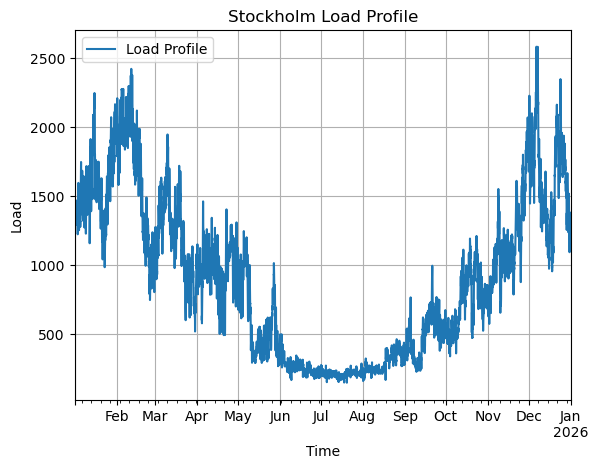

In [12]:
path = '/Users/jonathanhachez/Library/CloudStorage/OneDrive-VrijeUniversiteitBrussel/Publications/Articles/ongoing - Ali Kök/LoadProfile.xlsx'

df = pd.read_excel(path)


date = pd.to_datetime("2025-01-01 00:00")
index = pd.date_range(date, periods=len(df), freq='h').tz_localize('utc').tz_convert(tz='Europe/Stockholm')
df.index = index

df.plot()
plt.grid()
plt.ylabel('Load')
plt.xlabel('Time')
plt.title('Stockholm Load Profile')
df.rename(columns = {'Load Profile':'Original'}, inplace = True)

In [69]:
def cluster_data(n_typical_days):
    aggregation = tsam.TimeSeriesAggregation(df, noTypicalPeriods=n_typical_days,
                                                    hoursPerPeriod=24, 
                                                    clusterMethod='k_medoids', 
                                                    extremePeriodMethod='new_cluster_center')
    typPeriods = aggregation.createTypicalPeriods()
    metrics = aggregation.accuracyIndicators()
    return(metrics["RMSE"].iloc[0])


list_day = []
list_error = []
for n_days in range(1,21):
    error = float(cluster_data(n_days))
    list_day += [n_days]
    list_error += [error]
    print(f"{n_days} : {error}")

1 : 0.2359523314750089
2 : 0.13018997625406092
3 : 0.0833994121478356
4 : 0.07137255494585941
5 : 0.05811678101656031
6 : 0.05151131394631602
7 : 0.04814458091201878
8 : 0.046252462072591954
9 : 0.042236132631254086
10 : 0.04089308525429838
11 : 0.03970909997969267
12 : 0.0387233995826185
13 : 0.03789193017422249
14 : 0.037628571394380916
15 : 0.037081580482533495
16 : 0.035997446678339
17 : 0.03540285023423047
18 : 0.034874127012593466
19 : 0.03418262725504808
20 : 0.03363362909081756


Text(0, 0.5, 'RMSE (%)')

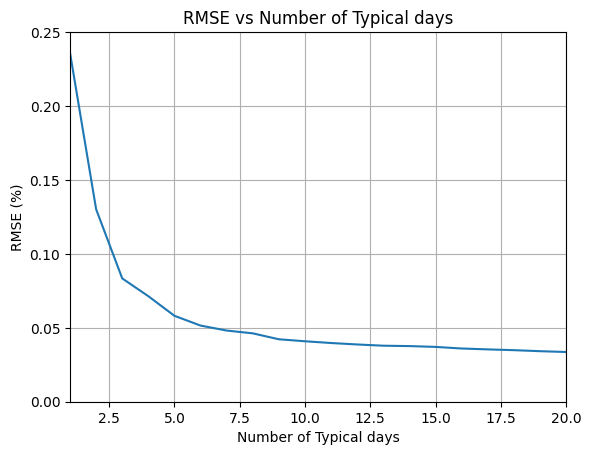

In [78]:
plt.plot(list_day,list_error)
plt.xlim(1,20)
plt.ylim(0,0.25)
plt.grid()
plt.title('RMSE vs Number of Typical days')
plt.xlabel('Number of Typical days')
plt.ylabel('RMSE (%)')

In [17]:
# number of typical days
n_typical_days = 12

aggregation = tsam.TimeSeriesAggregation(df, noTypicalPeriods=n_typical_days,
                                                hoursPerPeriod=7*24, 
                                                clusterMethod='k_medoids', 
                                                extremePeriodMethod='new_cluster_center')
typPeriods = aggregation.createTypicalPeriods()
metrics = aggregation.accuracyIndicators()
print(metrics)

             RMSE  RMSE_duration       MAE
Original  0.05933        0.00884  0.040481


      Typical day  TimeStep     Original
0               0         0  1397.254043
1               0         1  1360.708544
2               0         2  1364.706906
3               0         3  1334.444207
4               0         4  1393.616410
...           ...       ...          ...
2011           11       163  1306.280665
2012           11       164  1247.850659
2013           11       165  1227.419661
2014           11       166  1233.605041
2015           11       167  1226.291848

[2016 rows x 3 columns]


<Axes: >

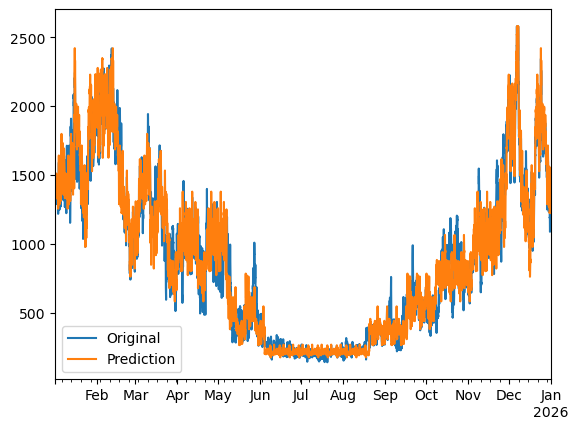

In [18]:

print(df2)
df2 = df.copy()
df2['Prediction'] = aggregation.predictOriginalData()
df2['Prediction'].name = 'Aggregated (TSAM)'
df2.plot()


      Typical day  TimeStep     Original
0               0         0  1397.254043
1               0         1  1360.708544
2               0         2  1364.706906
3               0         3  1334.444207
4               0         4  1393.616410
...           ...       ...          ...
2011           11       163  1306.280665
2012           11       164  1247.850659
2013           11       165  1227.419661
2014           11       166  1233.605041
2015           11       167  1226.291848

[2016 rows x 3 columns]


Text(0.5, 1.0, 'Value by Timestep and Segment')

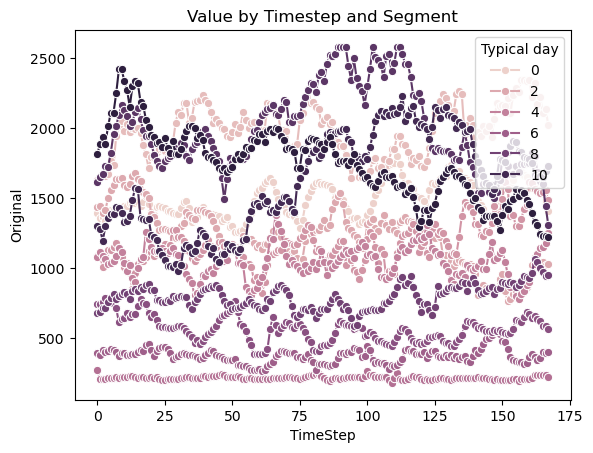

In [19]:

df2 = typPeriods.reset_index()
df2.rename(columns={'level_0':'Typical day'}, inplace = True)
print(df2)


sns.lineplot(
    data=df2,
    x='TimeStep',
    y='Original',
    hue='Typical day',
    marker='o'
)
plt.title('Value by Timestep and Segment')
# plt.xlim(0,23)